# 一、认识MNIST数据集

**MNIST：手写体数字数据集**

1. 训练集60000张，测试集10000张，一共70000张图片

2. 共10个类别：0~9

3. 每张图片的尺寸：28 x 28


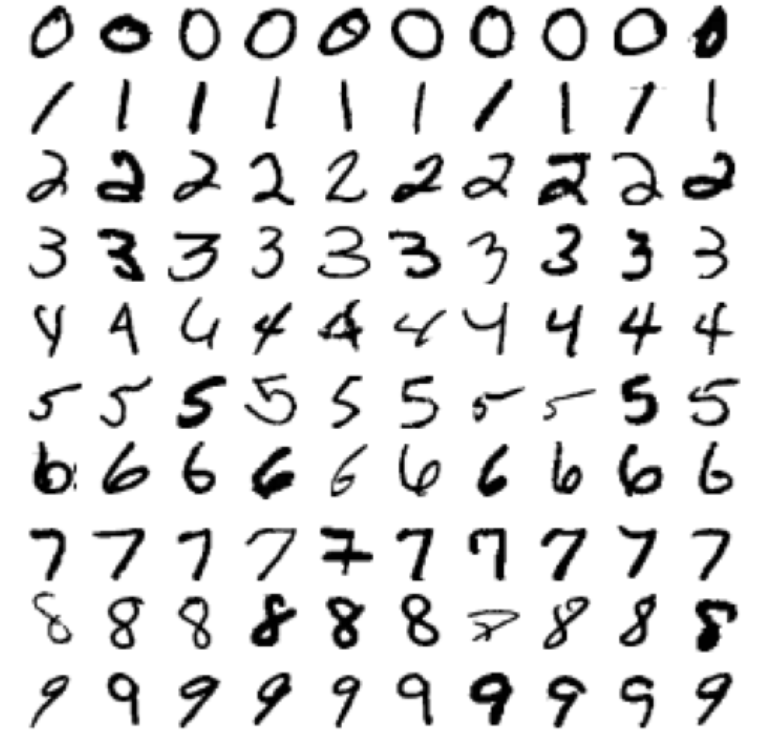

In [ ]:
# 一个单元格里面所有变量都会输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 1. 导入库
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
# 2. 读取数据
mnist = sio.loadmat('datasets/mnist-original.mat')
print("数据的键名为：",mnist.keys())
print("特征数据为: \n",mnist['data'])
print("目标数据为:",mnist['label'])
x = mnist["data"].T
y = mnist["label"].flatten()  #拍扁，降为一维
print("x的尺寸为：",x.shape)
print("y的尺寸为：",y.shape)
print("类别值有：",np.unique(y))
# 观察到mnist是字典型的数据

数据的键名为： dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
特征数据为: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
目标数据为: [[0. 0. 0. ... 9. 9. 9.]]
x的尺寸为： (70000, 784)
y的尺寸为： (70000,)
类别值有： [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [1]:
# 一个单元格里面所有变量都会输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 1. 导入库
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
# 2. 读取数据
mnist = sio.loadmat('datasets/mnist-original.mat')
print("数据的键名为：",mnist.keys())
print("特征数据为: \n",mnist['data'])
print("目标数据为:",mnist['label'])
x = mnist["data"].T
y = mnist["label"].flatten()  #拍扁，降为一维
print("x的尺寸为：",x.shape)
print("y的尺寸为：",y.shape)
print("类别值有：",np.unique(y))
# 观察到mnist是字典型的数据

数据的键名为： dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
特征数据为: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
目标数据为: [[0. 0. 0. ... 9. 9. 9.]]
x的尺寸为： (70000, 784)
y的尺寸为： (70000,)
类别值有： [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


从上述结果可以看出：
* mnist数据是字典型数据
* x 是特征数据，尺寸是70000×784
* y 是目标数据，尺寸是70000×1
* 有10个类别，分别为0,1,2,3,4,5,6,7,8,9

In [1]:
# 3.数据观察
image = x[60000]#显示x中索引为60000的图片
image_re = image.reshape(28,28)
plt.imshow(image_re,cmap=mpl.cm.binary,interpolation="nearest")

NameError: name 'x' is not defined

##### 'data' 键包含图像数据，每个图像为一个784维的列向量（因为每个图像是28x28像素，展平后得到784）。
##### 通过修改第一行索引，可以发现：数据集的数字是按照从小到小排的，也就是从0,1，....,9
##### 使用 plt.imshow() 函数显示图像。这里指定了颜色映射（cmap=mpl.cm.binary），它将较低的值（接近0的）显示为白色，较高的值（接近最大值的）显示为黑色。interpolation="nearest" 避免了插值带来的图像模糊。

Mnist数据集的类别为：[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.],
每一类的数量为：[6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


<Figure size 1000x500 with 0 Axes>

<Axes: >

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x1e4c6a31ed0>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

Text(0.5, 1.0, 'Class Distribution')

Text(0.5, 0, 'Class Label')

Text(0, 0.5, 'Number of Images')

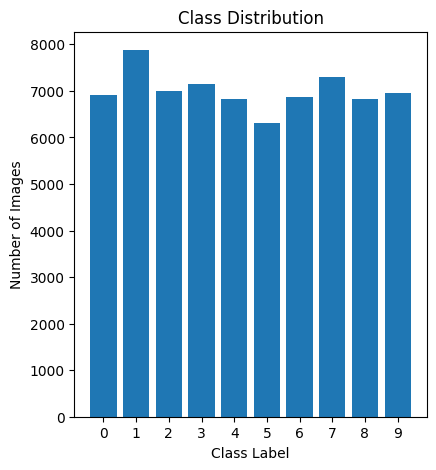

In [4]:
#3. 可视化数据分布
unique_labels, counts = np.unique(y, return_counts=True) 
print("Mnist数据集的类别为：{},\n每一类的数量为：{}".format(unique_labels,counts))

plt.figure(figsize = (10,5))
# 可视化训练集
plt.subplot(1,2,1)
plt.bar(unique_labels, counts) 
plt.xticks(unique_labels) 
plt.title('Class Distribution')  
plt.xlabel('Class Label')  
plt.ylabel('Number of Images')    

**数据x和y的前60000张图片是训练集，后面10000张图片是测试集**

In [5]:
# 4. 划分训练集和测试集，并把训练集随机打乱
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]
print("打乱训练集前的目标数据为：",y_train)
shuffle_index = np.random.permutation(60000)
#将训练集打乱
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]
print("打乱训练集后的目标数据为：",y_train)

打乱训练集前的目标数据为： [0. 0. 0. ... 9. 9. 9.]
打乱训练集后的目标数据为： [2. 1. 6. ... 2. 5. 8.]


# 二、二分类模型

## 2.1 案例1：手写体数字识别

1. 导入类
2. 读取数据
3. 划分数据集，并将训练集打乱
4. **将多分类问题转为二分类问题**
5. 模型训练：梯度下降法SGDClassifier
6. 模型预测
7. 模型评价（正确率作为评价指标）

In [6]:
# 1. 导入库
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
# 2. 读取数据
mnist = sio.loadmat('datasets/mnist-original.mat')
#print(mnist)
x = mnist["data"].T
y = mnist["label"].flatten()

# 3. 划分训练集和测试集，并把训练集随机打乱
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]
print("打乱训练集前的目标数据为：",y_train)
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]
print("打乱训练集后的目标数据为：",y_train)

# 4. 转为二分类问题
print("y_train转化为二分类前的类别是:{}".format(np.unique(y_train)))
y_train_5=(y_train==5)
y_test_5=(y_test==5)
print("y_train转化为二分类后的类别是:{}".format(np.unique(y_train_5)))

# 5. 模型训练：梯度下降法的分类模型
sgd_cla=SGDClassifier(max_iter=40,penalty='l2',l1_ratio=0.15,tol=0.001,shuffle=True).fit(x_train,y_train_5)

# 6. 模型预测
# sgd_reg.predict([image]) #预测第一部分输出的image图片
y_pre=sgd_cla.predict(x_test)

# 7. 模型评估：正确率
accuracy=accuracy_score(y_true=y_test_5,y_pred=y_pre)
print("分类正确率为：{:.2f}%".format(accuracy*100))

打乱训练集前的目标数据为： [0. 0. 0. ... 9. 9. 9.]
打乱训练集后的目标数据为： [7. 0. 0. ... 4. 5. 9.]
y_train转化为二分类前的类别是:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
y_train转化为二分类后的类别是:[False  True]
分类正确率为：93.63%


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [57]:
#True的比例是8.9%
per_true = y_test_5.sum()/len(y_test_5)
print("标签是5的比例是：{:.2f}%".format(per_true*100))
#False的比例是91%
per_false = 1-per_true
print("标签不是5的比例是：{:.2f}%".format(per_false*100))

标签是5的比例是：8.92%
标签不是5的比例是：91.08%


准确率很高，这看起来不错，但是，我们发现标签是5的只占9%，不是5的占91%，这就是类别不平衡性现象。假如，都猜测为False，那么就可以获得91%的正确率。

**总结：类别不平衡的数据集上，正确率不是一个合适的评价指标。**

## 2.2 模型评价：以手写体数字识别为例

导入方式：from sklearn.metrics import 评价指标函数名称
1. accuracy_score(y_true,y_pre) : 正确率
2. precision_score(y_true, y_pred) ：精确率
3. recall_score(y_true, y_pred)：查全率 
4. f1_score(y_true, y_pred)：F1分数
5. roc_auc_score(y_true, y_pre)：AUC的值

### 1）精确率：预测出的好瓜中，有多少比例是真的好瓜
$$precision=\frac{TP}{FP+TP}$$
方法1：
from sklearn.metrics import precision_score

In [58]:
from sklearn.metrics import precision_score
#左边真实右边预测
pre_score=precision_score(y_true=y_test_5,y_pred=y_pre)
print(pre_score)

0.4660033167495854


方法2：from sklearn.metrics import confusion_matrix

混淆矩阵
混淆矩阵=
* [[真阴性，假阳性]
* [假阴性，真阳性]]。

混淆矩阵=
* [[TN，FP]，
* [FN，TP]]


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test_5,y_pred=y_pre)

array([[8142,  966],
       [  49,  843]], dtype=int64)

### 2）查全率：实际好瓜中，有多少比例预测为好瓜了
$$recall=\frac{TP}{TP+FN}$$
方法1：from sklearn.metrics import recall_score

In [61]:
from sklearn.metrics import recall_score
recall_score(y_true=y_test_5,y_pred=y_pre)

0.945067264573991

方法2：from sklearn.metrics import confusion_matrix

混淆矩阵
混淆矩阵=
* [[真阴性，假阳性]
* [假阴性，真阳性]]。

混淆矩阵=
* [[TN，FP]，
* [FN，TP]]


In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test_5,y_pred=y_pre)

array([[8993,  115],
       [ 180,  712]], dtype=int64)

### 3）F1分数（重要）：

$$F1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=\frac{2*TP}{2*TP+FP+FN}$$

from sklearn.metrics import f1_score

In [65]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test_5,y_pred=y_pre)

0.8283885980221058

### 4）ROC 曲线的AUC值（重要）

AUC：ROC曲线下的面积
* AUC值越接近1，表示分类器性能越好。
* AUC在0.5~0.7之间，说明模型效果较差；
* AUC在0.7~0.9之间，说明模型效果中等；
* AUC在0.9以上，说明模型效果佳。
* 一般来说，AUC大于0.8，就可以认为模型效果较好。

from sklearn.metrics import roc_auc_score

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_5,y_pre)

0.8927900077003217

## 2.3 模型评价：以鸢尾花数据分类为例

1. 导入类
2. 读取数据
3. 转化为二分类问题
4. 划分数据集
5. 模型训练：基于梯度下降法、随机森林算法的分类器
6. 模型预测
7. 模型评价：利用正确率、精确率、查全率、F1值、AUC来评价模型

In [14]:
# 1. 导入类
from sklearn.datasets import load_iris   #导入鸢尾花数据集iris
import numpy as np
from sklearn.model_selection import train_test_split  #划分数据集
from sklearn.linear_model import SGDClassifier        #分类器：随机梯度下降法
from sklearn.ensemble import RandomForestClassifier   #分类器：随机森林
from sklearn.metrics import accuracy_score            #评价指标：正确率
from sklearn.metrics import precision_score           #评价指标：精确率
from sklearn.metrics import recall_score              #评价指标：查全率
from sklearn.metrics import f1_score                  #评价指标：F1分数
from sklearn.metrics import roc_auc_score             #评价指标：AUC值
# 2. 读取数据
iris_dataset=load_iris()
print("iris_dataset中的键：\n{}".format(iris_dataset.keys()))
x=iris_dataset['data']
y=iris_dataset['target']  #有标签，监督学习
labels,counts=np.unique(y,return_counts=True)
print("类别为：",labels,"每一类的个数为：",counts)
#3. 转为二分类问题
y=(y==1)
# 4. 划分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) 
# 5. 模型训练：基于梯度下降法
sgd_cla=SGDClassifier().fit(x_train,y_train)
# 6. 模型预测
y_pre=sgd_cla.predict(x_test)
# 7. 模型评价：利用正确率、精确率、查全率、F1值、AUC来评价模型
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
pre=precision_score(y_test,y_pre)
rel=recall_score(y_test,y_pre)
f1=f1_score(y_test,y_pre)
auc=roc_auc_score(y_test,y_pre)
print("-----------------------随机梯度下降---------------------------\n\
正确率为：{:.2f}%\n\
精确率为：{:.2f}%\n\
查全率为：{:.2f}%\n\
F1分数为：{:.2f}%\n\
AUC值为：{:.2f}%\n"\
      .format(acc*100,pre*100,rel*100,f1*100,auc*100))

# -----------------------随机森林---------------------------
# 5. 模型训练：随机森林算法的分类器
sgd_cla=RandomForestClassifier().fit(x_train,y_train)
# 6. 模型预测
y_pre=sgd_cla.predict(x_test)
# 7. 模型评价：利用正确率、精确率、查全率、F1值、AUC来评价模型
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
pre=precision_score(y_test,y_pre)
rel=recall_score(y_test,y_pre)
f1=f1_score(y_test,y_pre)
auc=roc_auc_score(y_test,y_pre)
print("-----------------------随机森林---------------------------\n\
正确率为：{:.2f}%\n\
精确率为：{:.2f}%\n\
查全率为：{:.2f}%\n\
F1分数为：{:.2f}%\n\
AUC值为：{:.2f}%\n"\
      .format(acc*100,pre*100,rel*100,f1*100,auc*100))

iris_dataset中的键：
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
类别为： [0 1 2] 每一类的个数为： [50 50 50]
-----------------------随机梯度下降---------------------------
正确率为：68.89%
精确率为：51.85%
查全率为：93.33%
F1分数为：66.67%
AUC值为：75.00%

-----------------------随机森林---------------------------
正确率为：97.78%
精确率为：100.00%
查全率为：93.33%
F1分数为：96.55%
AUC值为：96.67%



## 2.4 模型评价：以乳腺癌诊断为例

1. 导入库
2. 读取数据
3. 划分数据集
4. 模型训练：分别使用**基于梯度下降法、随机森林算法**分类器
5. 模型预测
6. 模型评价：利用正确率、精确率、查全率、F1值、AUC来评价模型

In [19]:
#1. 导入类
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier  #随机梯度下降法分类器
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.metrics import accuracy_score  #正确率
from sklearn.metrics import precision_score  #精确率
from sklearn.metrics import recall_score  #查全率
from sklearn.metrics import f1_score      #F1值
from sklearn.metrics import roc_auc_score   #AUC
# 2. 读取数据
breast_dataset=load_breast_cancer()  #通过datasets.load_导入的数据数据集都是data，标签都是target
print("breast_dataset中的键：\n{}".format(breast_dataset.keys()))
x=breast_dataset['data']
y=breast_dataset['target']  #有标签，监督学习
# 3. 划分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) 

# -----------------------梯度下降---------------------------
# 4. 模型训练：基于梯度下降法、随机森林算法的分类器
sgd_cla=SGDClassifier().fit(x_train,y_train)
# 5. 模型预测
y_pre=sgd_cla.predict(x_test)
# 6. 模型评价：利用正确率、精确率、查全率、F1值、AUC来评价模型
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
pre=precision_score(y_test,y_pre)
rel=recall_score(y_test,y_pre)
f1=f1_score(y_test,y_pre)
auc=roc_auc_score(y_test,y_pre)
print("-----------------------随机梯度下降---------------------------\n\
正确率为：{:.2f}%\n\
精确率为：{:.2f}%\n\
查全率为：{:.2f}%\n\
F1分数为：{:.2f}%\n\
AUC值为：{:.2f}%\n"\
      .format(acc*100,pre*100,rel*100,f1*100,auc*100))

# -----------------------随机森林---------------------------
# 4. 模型训练：随机森林算法的分类器
sgd_cla=RandomForestClassifier().fit(x_train,y_train)
# 5. 模型预测
y_pre=sgd_cla.predict(x_test)
# 6. 模型评价：利用正确率、精确率、查全率、F1值、AUC来评价模型
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
pre=precision_score(y_test,y_pre)
rel=recall_score(y_test,y_pre)
f1=f1_score(y_test,y_pre)
auc=roc_auc_score(y_test,y_pre)
print("-----------------------随机森林---------------------------\n\
正确率为：{:.2f}%\n\
精确率为：{:.2f}%\n\
查全率为：{:.2f}%\n\
F1分数为：{:.2f}%\n\
AUC值为：{:.2f}%\n"\
      .format(acc*100,pre*100,rel*100,f1*100,auc*100))

breast_dataset中的键：
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
-----------------------随机梯度下降---------------------------
正确率为：88.30%
精确率为：92.00%
查全率为：88.46%
F1分数为：90.20%
AUC值为：88.26%

-----------------------随机森林---------------------------
正确率为：94.74%
精确率为：96.12%
查全率为：95.19%
F1分数为：95.65%
AUC值为：94.61%



## 2.5 交叉验证：以乳腺癌数据集为例

* 输出：得到每个**训练集**验证的输出预测。
* 分别在K-1上训练模型，在余下的1折上验证模型，并将余下1折中样本的预测输出作为最终输出结果的一部分。

from sklearn.model_selection import cross_val_predict

cross_val_predict(estimator,x, y=None,  cv=None,  method='predict')
- estimator：实现‘fit’和‘predict’的估计器对象，用于拟合数据的对象。
- x：特征数据，形状为 (n_samples, n_features)，需要拟合的数据。
- y：目标数据，形状为 (n_samples,) 或 (n_samples, n_outputs)，默认=无，需要预测的目标变量。
- cv：确定交叉验证拆分策略。 默认 5 折交叉验证
- method：{‘predict’, ‘predict_proba’，‘predict_log_proba’，‘decision_function’}，默认='predict'

1. 导入类
2. 读取数据
3. 将数据集划分为训练集、测试集
4. 利用**交叉验证法**进行模型训练、模型预测
5. 模型评估（采用AUC评价指标）

In [51]:
# 1.导入类
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split     #划分数据集
from sklearn.linear_model import SGDClassifier  #随机梯度下降法分类器
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.metrics import roc_auc_score   #AUC
from sklearn.model_selection import cross_val_predict  #交叉验证

# 2. 读取数据
breast_dataset=load_breast_cancer()  
print("breast_dataset中的键：\n{}".format(breast_dataset.keys()))
x=breast_dataset['data']
y=breast_dataset['target']  
# 3. 模型定义：基于梯度下降法
sgd_cla=SGDClassifier()
# 4. 模型预测，不用划分的数据
y_pre=cross_val_predict(sgd_cla,x,y,method='predict',cv=5)  
y_pre.shape
# 5. 模型评价：利用正确率、精确率、查全率、F1值、AUC来评价模型
acc=accuracy_score(y,y_pre)  #不需要用划分的y
pre=precision_score(y,y_pre)
rel=recall_score(y,y_pre)
f1=f1_score(y,y_pre)
auc=roc_auc_score(y,y_pre)
print("-----------------------交叉验证---------------------------\n\
正确率为：{:.2f}%\n\
精确率为：{:.2f}%\n\
查全率为：{:.2f}%\n\
F1分数为：{:.2f}%\n\
AUC值为：{:.2f}%\n"\
      .format(acc*100,pre*100,rel*100,f1*100,auc*100))

breast_dataset中的键：
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
-----------------------交叉验证---------------------------
正确率为：82.95%
精确率为：89.39%
查全率为：82.63%
F1分数为：85.88%
AUC值为：83.06%



RandomForestClassifier()：这是Scikit-Learn库中用于分类的随机森林实现。该函数初始化一个随机森林分类器，默认参数下会构造一个具有100棵树的森林。
cross_val_predict：这个函数从sklearn.model_selection模块中导入，用于生成交叉验证的估计结果。这里的参数设置意味着在交叉验证中将数据分成3部分（cv=3），每部分轮流作为测试集。
因为y_score_rand输出的是2列的，第1列是表示属于负样本（肿瘤不是恶性）的概率，第2列是属于正样本（肿瘤是恶性）的概率，我只关心正样本的概率，也就是肿瘤是恶性的概率，所以，y_score_rand = y_score_rand[:,1]

# 三、多分类任务：以手写体数字识别为例

* 一对一策略（One vs. One，简称OvO）如svm
* 一对多策略（One vs. Rest，简称 OvR）如sdg

Sklearn 完成多分类的任务，它会自动地执行 OvR（除了 SVM 分类器，它使用 OvO）。

如果你想强制 Scikit-Learn 使用 OvO 策略或者 OvR 策略，你可以使用`OneVsOneClassifier`类或者`OneVsRestClassifier`类

* from sklearn.multiclass import OneVsOneClassifier
* from sklearn.multiclass import OneVsRestClassifier

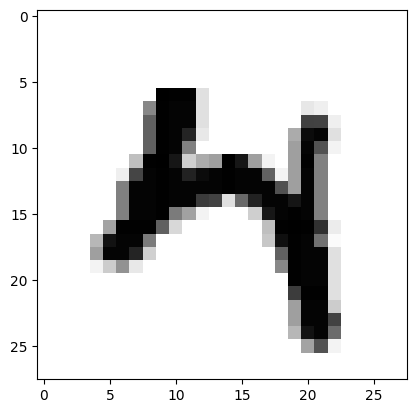

In [56]:
# 1. 导入库
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
# 2. 读取数据
mnist = sio.loadmat('datasets/mnist-original.mat')
#print(mnist)
x = mnist["data"].T
y = mnist["label"].flatten()
# 3. 划分训练集和测试集，并随机打乱
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]
# 读取x中的某一张图片
image = x[30000]#
image_re = image.reshape(28,28)
plt.imshow(image_re,cmap=mpl.cm.binary,interpolation="nearest")

In [54]:
image.shape
image_re.shape

(28, 28)

## 1） 一对多策略（One vs. Rest，简称 OvR）

每次将一个类别作为正类，其余（N-1）个类别作为负类，训练出N个分类器

Sklearn 完成多分类的任务，它会自动地执行 OvR（除了 SVM 分类器，它使用 OvO）。

In [64]:
from sklearn.linear_model import SGDClassifier  #随机梯度下降法分类器
sgd_ovr=SGDClassifier(max_iter=5).fit(x_train,y_train)
sgd_ovr.predict([image])  #输出下面的（预测得分）最大的一项的位置
sgd_ovr.decision_function([image])  #输出每个类的预测得分

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([4.])

array([[-404982.91645152, -902850.73209717, -406959.29142653,
        -260257.26460102,  302125.76434934,  -31591.80437376,
        -237602.19687365, -634915.55843132, -386460.92001857,
          -1839.30760907]])

## 2）一对一策略（One vs. One，简称 OvO）

将N个类别两两配对，产生N*(N-1)/2个二分类器。

from sklearn.multiclass import OneVsOneClassifier

In [74]:
from sklearn.multiclass import OneVsOneClassifier
sgd_ovo=OneVsOneClassifier(SGDClassifier(max_iter=5)).fit(x_train,y_train)
sgd_ovo.predict([image])
sgd_ovo.decision_function([image])  #10个，因为5*4/2=10

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider i

array([5.])

array([[ 2.66666672, -0.33333332,  0.66666673,  2.6666668 ,  8.33333331,
         9.3333333 ,  3.66666692,  3.66666685,  6.33333318,  7.3333333 ]])

In [73]:
sgd_ovo.estimators_
len(sgd_ovo.estimators_)  #45个，因为10*9/2=45

(SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_iter=5),
 SGDClassifier(max_i

45

## 作业：Mnist手写体数字识别
1. 导入库 （10分）
2. 读取数据 （10分）
3. 划分数据集，并随机打乱 （20分）
4. 模型训练：选择一种多分类器（比如：随机梯度下降法或者随机森林，等），采用两种多分类策略：OvO或者OvR（30分，其中，一种分类策略15分）
5. 模型预测：预测测试集的类别 （8分）
6. 模型评价：使用正确率、精确率、查全率、F1分数来评价模型，并输出评价指标  （12分，其中，一种评价指标3分）
7. 至少有一种分类器的正确率在92%以上（10分）

要求：上传HTML格式

In [151]:
# 1. 导入库
import numpy as np
import scipy.io as sio
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.metrics import accuracy_score  #正确率
from sklearn.metrics import precision_score  #精确率
from sklearn.metrics import recall_score  #查全率
from sklearn.metrics import f1_score      #F1值

# 2. 读取数据
mnist = sio.loadmat('datasets/mnist-original.mat')
#print(mnist)
x = mnist["data"].T
y = mnist["label"].flatten()

# 3. 划分训练集和测试集，并把训练集随机打乱
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]
print("打乱训练集前的目标数据为：",y_train)
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]
print("打乱训练集后的目标数据为：",y_train)

# 4. 模型训练：梯度下降法的分类模型
#一对多分类策略
sgd_ovr=SGDClassifier(max_iter=5).fit(x_train,y_train)
#一对一分类策略
sgd_ovo=OneVsOneClassifier(SGDClassifier(max_iter=6)).fit(x_train,y_train)

打乱训练集前的目标数据为： [0. 0. 0. ... 9. 9. 9.]
打乱训练集后的目标数据为： [9. 7. 2. ... 1. 3. 9.]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider i

In [152]:
# 5. 模型预测
ovr_pre=sgd_ovr.predict(x_test)  
ovo_pre=sgd_ovo.predict(x_test)

# 6. 模型评估
#一对多策略
acc=accuracy_score(y_test,ovr_pre)  
pre=precision_score(y_test,ovr_pre, average='weighted')
rel=recall_score(y_test,ovr_pre, average='weighted')
f1=f1_score(y_test,ovr_pre, average='weighted')
print("-----------------------一对多策略---------------------------\n\
正确率为：{:.2f}%\n\
精确率为：{:.2f}%\n\
查全率为：{:.2f}%\n\
F1分数为：{:.2f}%\n"\
      .format(acc*100,pre*100,rel*100,f1*100))
#一对一策略
acc=accuracy_score(y_test,ovo_pre)  
pre=precision_score(y_test,ovo_pre, average='weighted')
rel=recall_score(y_test,ovo_pre, average='weighted')
f1=f1_score(y_test,ovo_pre, average='weighted')
print("-----------------------一对一策略---------------------------\n\
正确率为：{:.2f}%\n\
精确率为：{:.2f}%\n\
查全率为：{:.2f}%\n\
F1分数为：{:.2f}%\n"\
      .format(acc*100,pre*100,rel*100,f1*100))

-----------------------一对多策略---------------------------
正确率为：87.23%
精确率为：88.00%
查全率为：87.23%
F1分数为：87.19%

-----------------------一对一策略---------------------------
正确率为：92.43%
精确率为：92.45%
查全率为：92.43%
F1分数为：92.42%



In [154]:
image = x[30000]
sgd_ovr.predict([image])

array([4.])